In [24]:
!pip install matplotlib
!pip install seaborn

In [2]:
! pip install pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
### Read the data file for the Gene Expression distribution ###
# Load the dataset
file_path = "~/Desktop/Bioinfo Projects/Biostate_2023_BA_Test_RevA.csv"
data = pd.read_csv(file_path)
data

,Gene ID,T0,T1,T2,T3,T4,T5,T6,T7,T8,Sample
0,1,1024,62,234,99,102,44,50,51,68,S1
1,2,2372,44,472,161,146,38,54,59,71,S1
2,3,4,0,2,0,0,0,0,0,0,S1
3,4,8,0,0,0,0,0,0,0,0,S1
4,5,16,2,2,0,0,2,2,0,0,S1
...,...,...,...,...,...,...,...,...,...,...,...
102509,17034,87,6,75,30,33,36,18,30,18,S6
102510,17035,645,69,114,60,63,18,42,30,12,S6
102511,17036,1398,165,465,180,177,39,114,48,72,S6
102512,17037,2364,192,585,309,213,132,201,126,72,S6


In [8]:
# Filter data for Sample S1 at T0
sample_S1_T0 = data[(data['Sample'] == 'S1') & (data['T0'] > 0)]

In [9]:
# Sort genes by expression levels
sample_S1_T0 = sample_S1_T0.sort_values(by='T0', ascending=False)

In [10]:
# Calculate median and average counts
median_count = sample_S1_T0['T0'].median()
average_count = sample_S1_T0['T0'].mean()

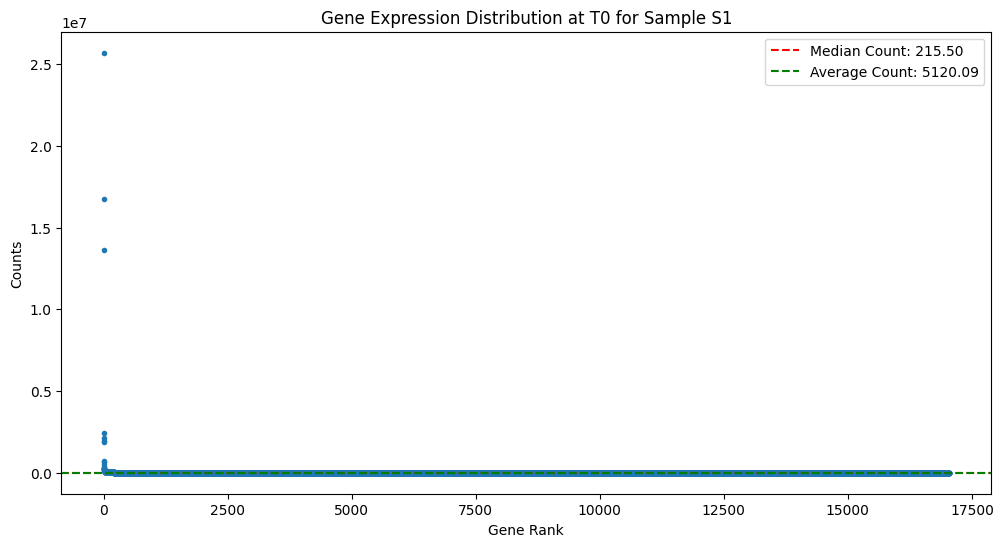

In [11]:
# Plot the gene rank vs. counts
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(sample_S1_T0) + 1), sample_S1_T0['T0'], marker='.', linestyle='none')
plt.xlabel('Gene Rank')
plt.ylabel('Counts')
plt.title('Gene Expression Distribution at T0 for Sample S1')
plt.axhline(median_count, color='red', linestyle='--', label=f'Median Count: {median_count:.2f}')
plt.axhline(average_count, color='green', linestyle='--', label=f'Average Count: {average_count:.2f}')
plt.legend()
plt.show()






In [ ]:
## Comparison Across Multiple Samples: Construct a scatter plot of the counts of S2
on the x-axis against counts of S3 on the y-axis ###


In [17]:
# Filter data for Sample S2
sample_S2 = data[data['Sample'] == "S2"]

# Calculate the mean for each column except 'Gene ID' and 'Sample'
sample_S2_means = sample_S2.drop(columns=['Gene ID', 'Sample']).mean()

# If you want to preserve the result as a DataFrame:
sample_S2_means_df = pd.DataFrame(sample_S2_means).T

# Display the result
print(sample_S2_means_df)

            T0          T1           T2           T3           T4  \
0  4768.597872  913.881467  1124.076361  1140.171289  1181.628156   

            T5           T6           T7           T8  
0  1093.791407  1317.275275  1145.881071  1153.076248  


In [18]:
# Filter data for Sample S2
sample_S3 = data[data['Sample'] == "S3"]

# Calculate the mean for each column except 'Gene ID' and 'Sample'
sample_S3_means = sample_S3.drop(columns=['Gene ID', 'Sample']).mean()

# If you want to preserve the result as a DataFrame:
sample_S3_means_df = pd.DataFrame(sample_S3_means).T

# Display the result
print(sample_S3_means_df)

            T0           T1           T2           T3          T4  \
0  4868.131812  1048.444276  1224.156261  1192.671374  1581.37799   

            T5           T6         T7           T8  
0  1371.115241  1349.882133  1297.5007  1213.031276  


In [22]:
# Assuming 'S2' and 'S3' DataFrames have already been calculated as in your previous code

# Combine 'S2' and 'S3' DataFrames and pivot them to long format
df = pd.concat([sample_S2_means_df, sample_S3_means_df])
df = df.melt(var_name='Time', value_name='Count')

# Filter the data to include only the first 9 rows for 'S2' and the next 9 rows for 'S3'
df = pd.concat([df[:9], df[9:18]], axis=1)
# Rename the columns
df.columns = ['Time', 'S2', 'Time1', 'S3']


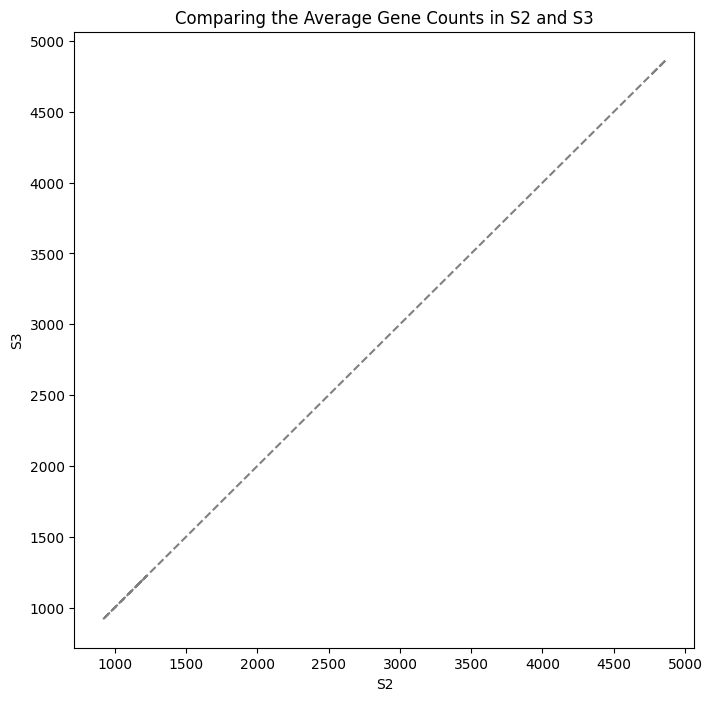

In [23]:
# Create the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(df['S2'], df['S3'], color='blue')
plt.plot(df['S2'], df['S2'], linestyle='--', color='gray')  # Add a diagonal reference line
plt.title("Comparing the Average Gene Counts in S2 and S3")
plt.xlabel("S2")
plt.ylabel("S3")
plt.show()

In [ ]:
###  Variability: Plot the coefficient of variation (CV) for the second sample (S2) across
different time points. Rank the genes based on their CV from high to low and plot the
gene rank on the x-axis and the counts on the y-axis ###

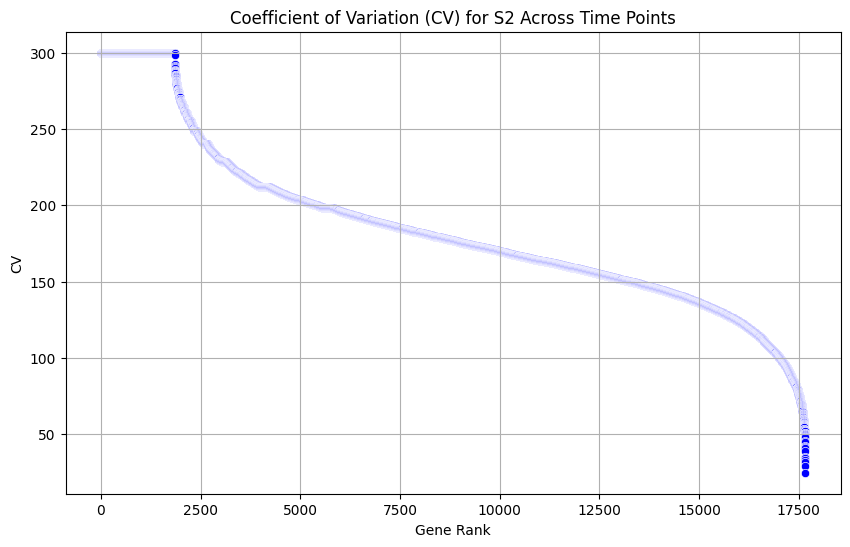

In [29]:
import seaborn as sns
# Assuming 'data' contains your dataset

# Filter the data for Sample S2 and columns T0 to T8
gene_expression_S2 = data[data['Sample'] == 'S2'].iloc[:, 1:10]

# Calculate the coefficient of variation (CV)
def calculate_cv(row):
    if len(row) > 1:
        cv = row.std() / row.mean() * 100
    else:
        cv = None
    return cv

cv = gene_expression_S2.apply(calculate_cv, axis=1)

# Create a DataFrame for CV
gene_cv_data = pd.DataFrame({'CV': cv})

# Rank the genes by CV
gene_cv_data = gene_cv_data.sort_values(by='CV', ascending=False).reset_index(drop=True)
gene_cv_data['Gene_Rank'] = gene_cv_data.index + 1

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gene_cv_data, x='Gene_Rank', y='CV', color='blue')
plt.title("Coefficient of Variation (CV) for S2 Across Time Points")
plt.xlabel("Gene Rank")
plt.ylabel("CV")
plt.grid(True)
plt.show()







In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' contains your dataset

# Filter data for Sample S4
sample_s4 = data[data['Sample'] == 'S4']
sample_s4

,Gene ID,T0,T1,T2,T3,T4,T5,T6,T7,T8,Sample
51842,1,970,209,250,49,58,56,41,69,64,S4
51843,2,1887,196,222,37,19,38,29,36,46,S4
51844,4,12,0,2,6,0,0,0,0,4,S4
51845,5,22,4,3,0,2,0,2,1,0,S4
51846,6,25,6,0,2,0,0,0,0,0,S4
...,...,...,...,...,...,...,...,...,...,...,...
68981,17034,21,16,3,20,15,15,7,15,10,S4
68982,17035,190,40,33,7,12,6,12,12,16,S4
68983,17036,622,149,116,32,17,51,30,25,27,S4
68984,17037,815,222,179,54,36,37,46,28,45,S4


In [32]:
# Calculate Total Counts and Gene Rank
sample_s4['Total_Counts'] = sample_s4.filter(like='T0').sum(axis=1) + sample_s4.filter(like='T1').sum(axis=1)
sample_s4['Gene_Rank'] = sample_s4['Total_Counts'].rank(ascending=False, method='min')

# Filter genes with Gene Rank between 100 and 150
selected_genes = sample_s4[(sample_s4['Gene_Rank'] >= 100) & (sample_s4['Gene_Rank'] <= 150)]

C:\Users\alqua\AppData\Local\Temp\ipykernel_35760\1378006969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_s4['Total_Counts'] = sample_s4.filter(like='T0').sum(axis=1) + sample_s4.filter(like='T1').sum(axis=1)
C:\Users\alqua\AppData\Local\Temp\ipykernel_35760\1378006969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_s4['Gene_Rank'] = sample_s4['Total_Counts'].rank(ascending=False, method='min')


In [33]:
# Select columns for the heatmap ('Gene ID', 'T0', 'T1')
heatmap_data = selected_genes[['Gene ID', 'T0', 'T1']]

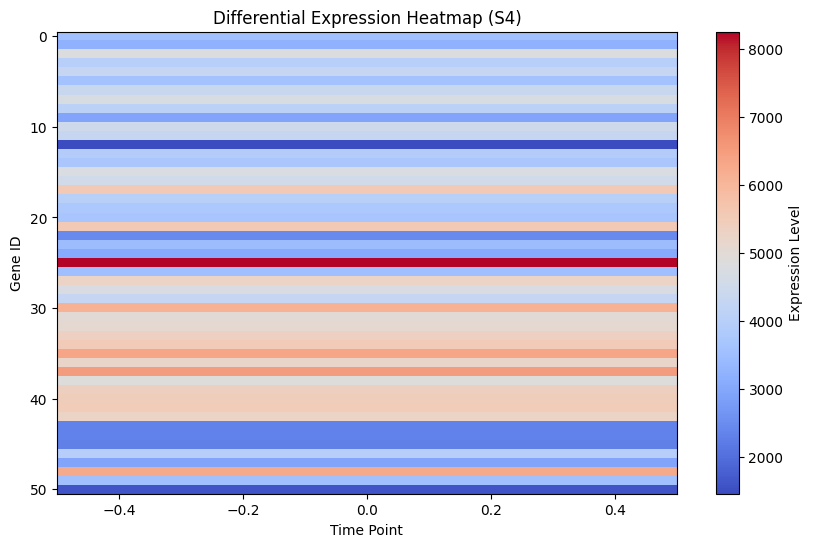

In [34]:
# Create the heatmap matrix
heatmap_matrix = heatmap_data.set_index('Gene ID').iloc[:, 1:].to_numpy()

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_matrix, aspect='auto', cmap='coolwarm')
plt.colorbar(label='Expression Level')
plt.xlabel('Time Point')
plt.ylabel('Gene ID')
plt.title('Differential Expression Heatmap (S4)')
plt.show()






In [35]:
### Cumulative Distributuion ##
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming 'data' contains your dataset

# Filter data for Sample S5 at T0
sample_s5_t0 = data[data['Sample'] == 'S5']['T0']

# Filter data for Sample S6 at T6
sample_s6_t6 = data[data['Sample'] == 'S6']['T6']

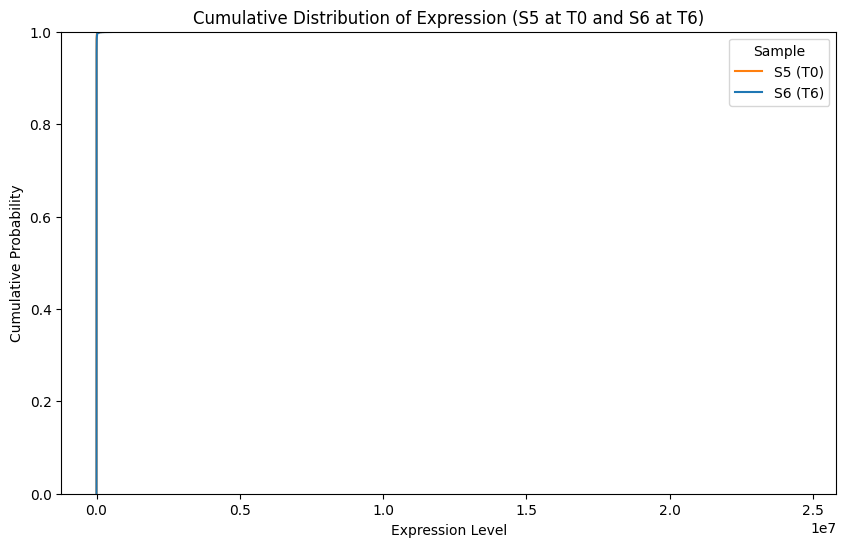

In [36]:
# Combine expression levels and create a corresponding 'Sample' column
cumulative_data = pd.DataFrame({
    'Expression_Level': pd.concat([sample_s5_t0, sample_s6_t6]),
    'Sample': ['S5 (T0)'] * len(sample_s5_t0) + ['S6 (T6)'] * len(sample_s6_t6)
})

# Create a cumulative distribution plot using Seaborn
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=cumulative_data, x='Expression_Level', hue='Sample', color=['blue', 'red'])
plt.xlabel('Expression Level')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Expression (S5 at T0 and S6 at T6)')
plt.legend(title='Sample', labels=['S5 (T0)', 'S6 (T6)'])
plt.show()